In [11]:
import zipfile
import os
import pandas as pd


def extract_data(zip_file_path, extracted_dir):
    """
    Extrahiert die Textdateien aus einer Zip-Datei in ein bestimmtes Verzeichnis.

    Args:
        zip_file_path (str): Pfad zur Zip-Datei.
        extracted_dir (str): Zielverzeichnis zum Extrahieren der Dateien.

    Returns:
        list: Eine Liste mit den Inhalten der extrahierten Textdateien.
    """
    data = []
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extracted_dir)
        print(f"Dateien aus {zip_file_path} erfolgreich extrahiert.")

        # Liste aller Textdateien im extrahierten Verzeichnis
        txt_files = [f for f in os.listdir(extracted_dir) if f.endswith('.txt')]

        # Lesen der Textdateien und Speichern der Inhalte
        for txt_file in txt_files:
            with open(os.path.join(extracted_dir, txt_file), 'r', encoding='utf-8') as file:
                text = file.read()
                data.append(text)

    except Exception as e:
        print(f"Fehler beim Extrahieren der Dateien aus {zip_file_path}: {e}")

    return data

def split_text_into_chunks(text, chunk_size=1000):
    """
    Teilt einen Text in Abschnitte von einer bestimmten Anzahl von Wörtern auf.

    Args:
        text (str): Der zu teilende Text.
        chunk_size (int): Die Anzahl der Wörter pro Abschnitt.

    Returns:
        list: Eine Liste mit den aufgeteilten Abschnitten des Textes.
    """
    words = text.split()
    chunks = [words[i:i+chunk_size] for i in range(0, len(words), chunk_size)]
    # Löschen der letzten Wörter, um die Länge auf chunk_size zu bringen
    chunks = [chunk[:chunk_size] for chunk in chunks]
    return [' '.join(chunk) for chunk in chunks]

# Pfad und Verzeichnis für die erste ZIP-Datei
zip_file_path_1 = 'Die_Kaeserei_in_der_Vehfreude__ELTeC_Ausgabe_etc.zip'
extracted_dir_1 = 'extrahierte_dateien_1'

# Extrahieren der ersten ZIP-Datei
data_1 = extract_data(zip_file_path_1, extracted_dir_1)

# Pfad und Verzeichnis für die zweite ZIP-Datei
zip_file_path_2 = 'Anna___ELTeC_ausgabe_etc1.zip'
extracted_dir_2 = 'extrahierte_dateien_2'

# Extrahieren der zweiten ZIP-Datei
data_2 = extract_data(zip_file_path_2, extracted_dir_2)

# Teilen der Texte in Abschnitte von 1000 Wörtern
data_1_chunks = [split_text_into_chunks(text) for text in data_1]
data_2_chunks = [split_text_into_chunks(text) for text in data_2]

# Kombinieren der Abschnitte aus beiden Datensätzen
combined_chunks = data_1_chunks + data_2_chunks

# Flach machen der kombinierten Abschnitte
flattened_chunks = [chunk for sublist in combined_chunks for chunk in sublist]

# Erstellen eines DataFrame aus den kombinierten Abschnitten
df = pd.DataFrame({'Text': flattened_chunks})

# Hinzufügen einer Quellenspalte für die beiden Datensätze
df['Source'] = [0] * sum(len(chunks) for chunks in data_1_chunks) + [1] * sum(len(chunks) for chunks in data_2_chunks)

Dateien aus Die_Kaeserei_in_der_Vehfreude__ELTeC_Ausgabe_etc.zip erfolgreich extrahiert.
Dateien aus Anna___ELTeC_ausgabe_etc1.zip erfolgreich extrahiert.


In [12]:
df

,Text,Source
0,"Erstes Kapitel In einer der Querstraßen, die v...",0
1,"glauben, skizzieren könne jeder und Ideen habe...",0
2,sichtlicher Erregung auf den Oheim zuschritt. ...,0
3,"der jetzt krank auf Schloß Arpa liegt, weil er...",0
4,"aufrichtig nachempfunden war, streifte die Kün...",0
...,...,...
17459,"ihre Gäste liegen, daß es Zeit sei, sich zu en...",1
17460,nahm und ihr lange und tief in das blaue Auge ...,1
17461,"wo das Glück beginnen soll, den Tod im Arm zu ...",1
17462,"Höhlen verlassen, seine Lippen stammelten unar...",1


In [13]:
x = df.drop(columns=["Source"])
y = pd.DataFrame(df["Source"])

In [14]:
y

,Source
0,0
1,0
2,0
3,0
4,0
...,...
17459,1
17460,1
17461,1
17462,1


In [15]:
x

,Text
0,"Erstes Kapitel In einer der Querstraßen, die v..."
1,"glauben, skizzieren könne jeder und Ideen habe..."
2,sichtlicher Erregung auf den Oheim zuschritt. ...
3,"der jetzt krank auf Schloß Arpa liegt, weil er..."
4,"aufrichtig nachempfunden war, streifte die Kün..."
...,...
17459,"ihre Gäste liegen, daß es Zeit sei, sich zu en..."
17460,nahm und ihr lange und tief in das blaue Auge ...
17461,"wo das Glück beginnen soll, den Tod im Arm zu ..."
17462,"Höhlen verlassen, seine Lippen stammelten unar..."


In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [17]:
x_train,y_train


(                                                    Text
 3293   was würden die Bekannten zu einer plötzlichen ...
 6832   dann komme ich ja und hole sie.“So blieb es de...
 10689  nicht schnelle, sondern gemach durch das gerei...
 7468   jetzt vielleicht die Feierglocken ins Abendrot...
 12090  verwies Angelika aufs heftigste und wäre nun f...
 ...                                                  ...
 7419   fahr mit Gott!“ rief die Mutter hinter den Nel...
 9083   kämen, so wären dort die Heiden, die sie ans K...
 2402   von ungefähr in die Nähe des Mädchens kam, sch...
 3949   Bürgern zu, die mit Waffen gelaufen kamen; aus...
 11046  Ohr zu haben und war nur Auge für Kitty und se...
 
 [13971 rows x 1 columns],
        Source
 3293        0
 6832        0
 10689       0
 7468        0
 12090       0
 ...       ...
 7419        0
 9083        0
 2402        0
 3949        0
 11046       0
 
 [13971 rows x 1 columns])

In [18]:
import numpy as np

numpy_x_train = np.array(x_train)
numpy_x_train

array([["was würden die Bekannten zu einer plötzlichen Abreise gesagt haben, wie hätte er seiner geliebten Frau und Lenore das Opfer zumuten können? So verschloß er den Ärger in sich. Er entschuldigte gegenüber den besorgten Fragen der Baronin seine Verstimmung durch eine Erkältung auf der Reise, aber tagelang nagte der Gedanke an ihm, daß er einen Verlust erlitten habe, daß er zurückgekommen sei; und je sanguinischer er vorher gewesen war, desto niedergeschlagener wurde er jetzt. Ja es geschah, daß er auf einem Spaziergange durch die Stadt bei einem Lotterieeinnehmer eintrat und ein Lotterielos kaufte, damit ein gütiges Geschick das gutmachen möge, was schadhaft war. Zuweilen, besonders am Abend, wenn er aus heiterer Gesellschaft kam, lächelte er selbst über diese Verstimmung und schalt sie töricht. Das ganze Unglück war so un bedeutend, es war ja keine Lebensfrage; in wenigen Jahren konnten seine Angelegenheiten wieder aufs beste arrangiert sein. Nur an den nüchternen Morgen kam ihm 

In [19]:
import fasttext
tokenizer = fasttext.load_model('cc.de.100.bin') 

In [20]:


import fasttext.util
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Initialisiere eine leere Liste für die gepaddeten Sequenzen und die Labels
padded_sequences = []
listofnonthousands =[]
labels = []
def text_to_sequences(tokenizer,text,i):
    
    splittext = str.split(text)
    if len(splittext)<1000:
        print(len(splittext),i)
        listofnonthousands.append(i)
        return []
    
    sequence = np.array([tokenizer.get_word_vector(word) for word in splittext])
    return sequence


# Iteriere über jeden Text in der DataFrame
for i,text in enumerate(numpy_x_train):
    # Erstelle einen neuen Tokenizer für jeden Text
    
   
    # Konvertiere den Text in Sequenzen von Zahlen
    sequence = text_to_sequences(tokenizer,text[0],i) 
    # print(sequence) # Erhalte die Sequenz für den aktuellen Text

    # Padding der Sequenz auf eine einheitliche Länge
    # max_length = 1000
    # sequence = sequence.reshape(-1)
    # print(sequence)
    # padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')  # Padded die Sequenz
    # padded_sequences.append(padded_sequence)
    
    padded_sequences.extend(sequence)
      # Beispiel: Eine feste Länge von 1000 Wörtern
    
  


listofnonthousands

562 60
897 84
7 194
458 582
627 652
281 688
4 799
10 804
502 889
761 965
436 995
239 996
4 1165
427 1274
662 1351
659 1368
668 1525
78 1577
343 1584
667 1612
19 1708
792 1760
101 1855
608 1857
232 1871
473 1886
978 1958
740 2135
6 2145
747 2292
600 2409
902 2427
842 2499
725 2563
246 2593
240 2825
961 2923
79 2962
835 3373
747 3419
631 3688
715 3696
342 3817
924 3970
631 4030
441 4036
920 4223
990 4298
632 4398
38 4507
592 4555
273 4593
13 4675
435 4728
226 4845
390 5072
753 5230
745 5277
149 5386
731 5435
560 5543
668 5631
750 5755
527 5871
837 5927
399 6001
759 6220
695 6325
401 6519
571 6595
127 6800
567 6842
87 6865
658 7160
445 7237
131 7316
513 7366
327 7450
881 7473
750 7523
221 7527
623 7718
666 7720
850 7752
968 7858
96 7953
120 8015
811 8076
132 8261
262 8500
752 8528
939 8554
912 8632
540 8683
129 8690
47 8765
231 8780
575 8795
696 8891
706 8981
306 9111
383 9136
908 9158
708 9211
288 9225
412 9272
448 9284
323 9311
946 9345
77 9480
80 9515
150 9645
768 9869
709 10079
4 1020

[60,
 84,
 194,
 582,
 652,
 688,
 799,
 804,
 889,
 965,
 995,
 996,
 1165,
 1274,
 1351,
 1368,
 1525,
 1577,
 1584,
 1612,
 1708,
 1760,
 1855,
 1857,
 1871,
 1886,
 1958,
 2135,
 2145,
 2292,
 2409,
 2427,
 2499,
 2563,
 2593,
 2825,
 2923,
 2962,
 3373,
 3419,
 3688,
 3696,
 3817,
 3970,
 4030,
 4036,
 4223,
 4298,
 4398,
 4507,
 4555,
 4593,
 4675,
 4728,
 4845,
 5072,
 5230,
 5277,
 5386,
 5435,
 5543,
 5631,
 5755,
 5871,
 5927,
 6001,
 6220,
 6325,
 6519,
 6595,
 6800,
 6842,
 6865,
 7160,
 7237,
 7316,
 7366,
 7450,
 7473,
 7523,
 7527,
 7718,
 7720,
 7752,
 7858,
 7953,
 8015,
 8076,
 8261,
 8500,
 8528,
 8554,
 8632,
 8683,
 8690,
 8765,
 8780,
 8795,
 8891,
 8981,
 9111,
 9136,
 9158,
 9211,
 9225,
 9272,
 9284,
 9311,
 9345,
 9480,
 9515,
 9645,
 9869,
 10079,
 10209,
 10382,
 10432,
 10481,
 10486,
 10651,
 10785,
 10871,
 10900,
 10962,
 11044,
 11063,
 11102,
 11196,
 11444,
 11764,
 11904,
 11910,
 12051,
 12116,
 12158,
 12185,
 12383,
 12420,
 12545,
 12581,
 12583,

In [21]:
#man sieht beim Debuggen, dass tatsaechlich ca 150 Elemente von x_train nicht 1000 Woerter haben. Deswegen muss man diese loeschen. Konventionelle padding Methoden machen die Daten ungenau und ist durch die Dimension der Liste auch schwierig, es effizient zu implementieren
len(listofnonthousands)


157

In [22]:
import pandas as pd

# Sample DataFrame


# List of indices to remove


# Remove elements at specified indices
y_train = y_train.drop(y_train.index[listofnonthousands])
padded_sequences= filtered_list = [sublist for sublist in padded_sequences if sublist != []]


/var/folders/8s/p0s5_7hs56q6cx4vr8n1sqqc0000gn/T/ipykernel_2423/2362527552.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  padded_sequences= filtered_list = [sublist for sublist in padded_sequences if sublist != []]


padded_sequences.shape

In [23]:
padded_sequences=np.array(padded_sequences).reshape(-1,1000,100)

In [24]:

np.array(padded_sequences).shape

(13814, 1000, 100)

Epoch 1/50
432/432 [==============================] - 113s 256ms/step - loss: 0.5070 - accuracy: 0.7881
Epoch 2/50
432/432 [==============================] - 107s 247ms/step - loss: 0.4506 - accuracy: 0.7941
Epoch 3/50
432/432 [==============================] - 100s 231ms/step - loss: 0.4199 - accuracy: 0.8088
Epoch 4/50
432/432 [==============================] - 100s 232ms/step - loss: 0.3872 - accuracy: 0.8289
Epoch 5/50
432/432 [==============================] - 91s 211ms/step - loss: 0.3676 - accuracy: 0.8381
Epoch 6/50
432/432 [==============================] - 104s 241ms/step - loss: 0.3560 - accuracy: 0.8433
Epoch 7/50
432/432 [==============================] - 501s 1s/step - loss: 0.3485 - accuracy: 0.8488
Epoch 8/50
432/432 [==============================] - 267s 619ms/step - loss: 0.3324 - accuracy: 0.8562
Epoch 9/50
432/432 [==============================] - 393s 911ms/step - loss: 0.3285 - accuracy: 0.8562
Epoch 10/50
432/432 [==============================] - 401s 930ms/st

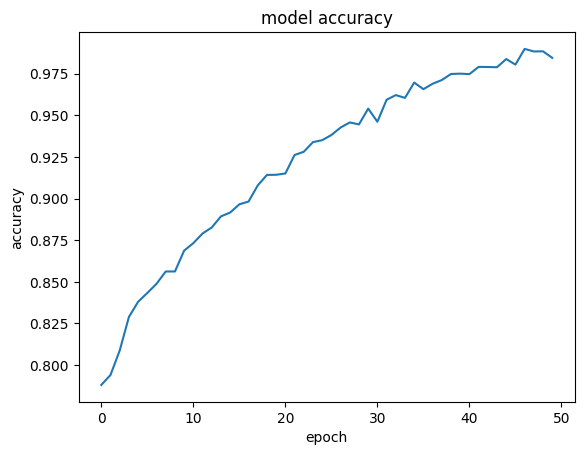

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import pyplot as plt


def train_model(y_train, padded_sequences):
    # Erstellung des Modells
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv1D(256, 5, activation='relu', input_shape=(1000,100)),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Kompilieren und Anpassen des Modells
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(padded_sequences, y_train, epochs=50)
    plt.plot(history.history['accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')


    return model

model = train_model(y_train, padded_sequences)

In [28]:
model.save('100token1000words50epochs.keras')

In [27]:
import pandas as pd
import numpy as np



# Zähle die Anzahl der Nullen und Einsen
num_zeros = (y_test['Label'] == 0).sum()
num_ones = (y_test['Label'] == 1).sum()

num_zeros,num_ones

KeyError: 'Label'

In [ ]:
# Bestimme, wie viele Nullen gelöscht werden müssen, um genau 50% Nullen und Einsen zu haben
num_zeros_to_delete = num_zeros - num_ones

# Wenn die Anzahl der Nullen größer als die Anzahl der Einsen ist, löschen Sie die überschüssigen Nullen
if num_zeros_to_delete > 0:
    y_test_balanced = y_test.drop(y_test[y_test['Label'] == 0].sample(n=num_zeros_to_delete).index)
# Wenn die Anzahl der Einsen größer ist, löschen Sie die überschüssigen Einsen
elif num_zeros_to_delete < 0:
    num_ones_to_delete = -num_zeros_to_delete
    y_test_balanced = y_test.drop(y_test[y_test['Label'] == 1].sample(n=num_ones_to_delete).index)
# Wenn die Anzahl der Nullen und Einsen bereits ausgeglichen ist, verwenden Sie einfach die ursprüngliche Tabelle
else:
    y_test_balanced = y_test.copy()

# Überprüfen Sie die Verteilung der Nullen und Einsen in der ausgewogenen Tabelle
print(y_test_balanced['Label'].value_counts())

In [97]:
model =tf.keras.models.load_model('20token1000words100epochs.keras')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 996, 128)          12928     
                                                                 
 global_average_pooling1d_4  (None, 128)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21249 (83.00 KB)
Trainable params: 21249 (83.00 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [30]:

import fasttext.util
import tensorflow as tf
import pandas as pd
import numpy as np
numpy_x_test = np.array(x_test)

# Initialisiere eine leere Liste für die gepaddeten Sequenzen und die Labels
padded_test_sequences = []
listofnonthousands =[]
labels = []
def text_to_sequences(tokenizer,text,i):
    
    splittext = str.split(text)
    if len(splittext)<1000:
        print(len(splittext),i)
        listofnonthousands.append(i)
        return []
    
    sequence = np.array([tokenizer.get_word_vector(word) for word in splittext])
    return sequence


# Iteriere über jeden Text in der DataFrame
for i,text in enumerate(numpy_x_test):
    
   
    # Konvertiere den Text in Sequenzen von Zahlen
    sequence = text_to_sequences(tokenizer,text[0],i) 
    
    
    padded_test_sequences.extend(sequence)
  
    
  


listofnonthousands




42 54
424 204
984 302
414 396
170 417
851 493
681 502
628 544
416 723
514 917
170 947
543 1067
867 1259
334 1306
295 1379
741 1395
796 1409
761 1428
971 1444
720 1453
459 1497
416 1764
282 1818
804 1870
246 1906
449 2001
306 2206
459 2223
580 2334
784 2336
925 2404
888 2631
591 2708
175 2882
710 2883
265 2957
415 3068
884 3216
350 3371
920 3400
716 3421
973 3424


[54,
 204,
 302,
 396,
 417,
 493,
 502,
 544,
 723,
 917,
 947,
 1067,
 1259,
 1306,
 1379,
 1395,
 1409,
 1428,
 1444,
 1453,
 1497,
 1764,
 1818,
 1870,
 1906,
 2001,
 2206,
 2223,
 2334,
 2336,
 2404,
 2631,
 2708,
 2882,
 2883,
 2957,
 3068,
 3216,
 3371,
 3400,
 3421,
 3424]

In [21]:
len(y_test)

3493

In [31]:

# Remove elements at specified indices
y_test = y_test.drop(y_test.index[listofnonthousands])
padded_test_sequences= filtered_list = [sublist for sublist in padded_test_sequences if sublist != []]



/var/folders/8s/p0s5_7hs56q6cx4vr8n1sqqc0000gn/T/ipykernel_2423/1877309890.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  padded_test_sequences= filtered_list = [sublist for sublist in padded_test_sequences if sublist != []]


In [105]:
np.array(padded_sequences).shape

(3453, 1000, 20)

In [34]:
len(padded_test_sequences)
padded_test_sequences=np.array(padded_test_sequences).reshape(-1,1000,100)

In [54]:
padded_test_sequences.shape

(3453, 1000, 20)

In [35]:
test_preds = model.predict(padded_test_sequences)
test_preds,test_preds.shape,np.round(test_preds),np.sum(np.round(test_preds))
# So wuerde mann es manuell starten zu evaluaten, ist aber unnoetig wegen der evaluate function

 49/108 [============>.................] - ETA: 9s

KeyboardInterrupt: 

,Source
9945,0
9730,0
7682,0
6730,0
2526,0
...,...
6505,0
3044,0
12674,0
16536,1


In [36]:
model.evaluate(np.array(padded_test_sequences),y_test)



108/108 [==============================] - 15s 129ms/step - loss: 0.2157 - accuracy: 0.9328


[0.21571694314479828, 0.9327731132507324]

In [ ]:
model.evaluate(np.array(padded))

In [68]:
# def evaluate(test_preds,y_test):
#     for i in range(len(y_test)):
#         print(y_test[i]== test_preds[i])
#     # [test_preds[i]==y_test[i] for i in range(len(y_test))]
# evaluate(test_preds,y_test)

KeyError: 0